In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yfn
from yahoofinancials import YahooFinancials as YF
import pandas_datareader.data as web

In [2]:
hdfc_dt = yfn.download('HDFCBANK.NS',start='2019-02-28',end='2020-02-29',progress=False);
sbi_dt  = yfn.download('SBIN.NS',start='2019-02-28',end='2020-02-29',progress=False);
hdfc_close = hdfc_dt['Close']
hdfc_mavg = hdfc_close.rolling(window=5).mean()

In [3]:
sbi_close = sbi_dt['Close']
sbi_mavg = sbi_close.rolling(window=5).mean()

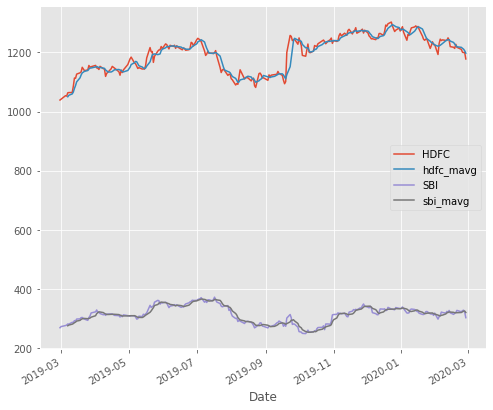

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

hdfc_close.plot(label='HDFC')

hdfc_mavg.plot(label='hdfc_mavg')
sbi_close.plot(label='SBI')

sbi_mavg.plot(label='sbi_mavg')
plt.legend()

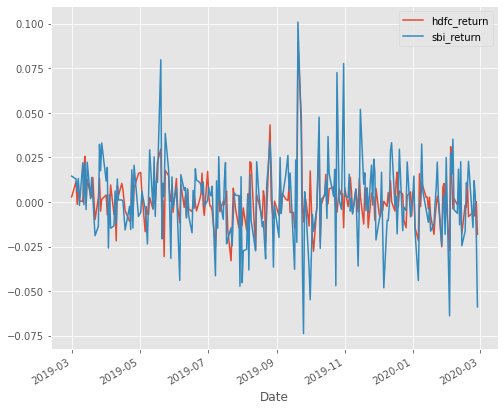

In [5]:
hdfc_rets = hdfc_close / hdfc_close.shift(1) - 1
hdfc_rets.plot(label='hdfc_return')
sbi_rets = sbi_close / sbi_close.shift(1) - 1
sbi_rets.plot(label='sbi_return')
plt.legend()

In [6]:
print("mean of hdfc returns :",np.mean(hdfc_rets) )
print("mean of sbi returns :",np.mean(sbi_rets) )

mean of hdfc returns : 0.0005980982383814833
mean of sbi returns : 0.0007473397368360625


In [7]:
print("variance of hdfc returns :",np.var(hdfc_rets))
print("variance of sbi returns :",np.var(sbi_rets))

variance of hdfc returns : 0.00016529734111608206
variance of sbi returns : 0.0005183900429150887


In [8]:
print("skewness hdfc_returns : ",hdfc_rets.skew())
print("skewness sbi_returns : ",sbi_rets.skew())

skewness hdfc_returns :  1.544588943489465
skewness sbi_returns :  0.2933685567162913


In [9]:
k1 = pd.Series(hdfc_rets)
k2 = pd.Series(sbi_rets)
print("Kurtosis hdfc returns : " , k1.kurtosis() )
print("Kurtosis sbi returns : " , k2.kurtosis() )

Kurtosis hdfc returns :  9.829858479022135
Kurtosis sbi returns :  2.6042492229756196


In [10]:
corr = hdfc_dt['Close'].corr(sbi_dt['Close'])
print("correlation of both the stocks is",corr)

correlation of both the stocks is 0.42091930797354743


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
#from pandas_datareader import data as pdr
import fix_yahoo_finance
import datetime
import yfinance as yf

start = datetime.datetime(2014,1,1)
end = datetime.datetime(2018,5,31)

tick = ['TSLA', 'MSFT', 'T', 'LNVGY', 'AAPL']
price_data = yf.download(tick,start,end)['Adj Close']
# price_data = web.get_data_yahoo(tick,
#                            start,
#                            end )['Adj Close']
price_data.head()

C:\Users\user\anaconda3\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



[*********************100%***********************]  5 of 5 completed


,AAPL,LNVGY,MSFT,T,TSLA
Date,,,,,
2014-01-02,17.364962,16.283142,31.420715,12.690654,10.006667
2014-01-03,16.983526,16.129086,31.209314,12.636189,9.970667
2014-01-06,17.076136,15.807577,30.549789,12.694288,9.800000
2014-01-07,16.954008,15.553048,30.786545,12.690654,9.957333
2014-01-08,17.061386,15.506162,30.236948,12.653344,10.085333


In [12]:
log_ret = np.log(price_data/price_data.shift(1))

In [13]:
cov_mat = log_ret.cov() * 252
print(cov_mat)

           AAPL     LNVGY      MSFT         T      TSLA
AAPL   0.052362  0.012896  0.024184  0.008875  0.026175
LNVGY  0.012896  0.104738  0.016401  0.007912  0.021257
MSFT   0.024184  0.016401  0.049911  0.011075  0.028169
T      0.008875  0.007912  0.011075  0.026015  0.010670
TSLA   0.026175  0.021257  0.028169  0.010670  0.168267


In [14]:
# Simulating 5000 portfolios
num_port = 5000
# Creating an empty array to store portfolio weights
all_wts = np.zeros((num_port, len(price_data.columns)))
# Creating an empty array to store portfolio returns
port_returns = np.zeros((num_port))
# Creating an empty array to store portfolio risks
port_risk = np.zeros((num_port))
# Creating an empty array to store portfolio sharpe ratio
sharpe_ratio = np.zeros((num_port))

In [15]:
for i in range(num_port):
  wts = np.random.uniform(size = len(price_data.columns))
  wts = wts/np.sum(wts)
  
  # saving weights in the array
  
  all_wts[i,:] = wts
  
  # Portfolio Returns
  
  port_ret = np.sum(log_ret.mean() * wts)
  port_ret = (port_ret + 1) ** 252 - 1
  
  # Saving Portfolio returns
  
  port_returns[i] = port_ret
  
  
  # Portfolio Risk
  
  port_sd = np.sqrt(np.dot(wts.T, np.dot(cov_mat, wts)))
  
  port_risk[i] = port_sd
  
  # Portfolio Sharpe Ratio
  # Assuming 0% Risk Free Rate
  
  sr = port_ret / port_sd
  sharpe_ratio[i] = sr

In [16]:
names = price_data.columns
min_var = all_wts[port_risk.argmin()]
print(min_var)

[0.20185667 0.10449406 0.11422407 0.57063725 0.00878796]


In [17]:
max_sr = all_wts[sharpe_ratio.argmax()]
print(max_sr)

[0.41144437 0.00064981 0.44048207 0.1134161  0.03400764]


In [18]:
print(sharpe_ratio.max())

1.3103735073889693


In [19]:
print(port_risk.min())

0.13853087977965758


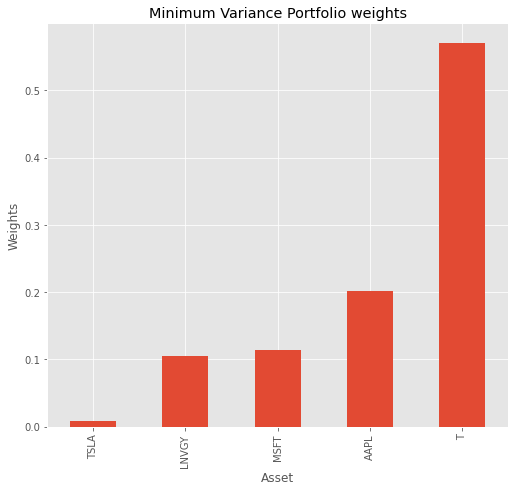

In [20]:
min_var = pd.Series(min_var, index=names)
min_var = min_var.sort_values()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Asset')
ax1.set_ylabel("Weights")
ax1.set_title("Minimum Variance Portfolio weights")
min_var.plot(kind = 'bar')
plt.show();

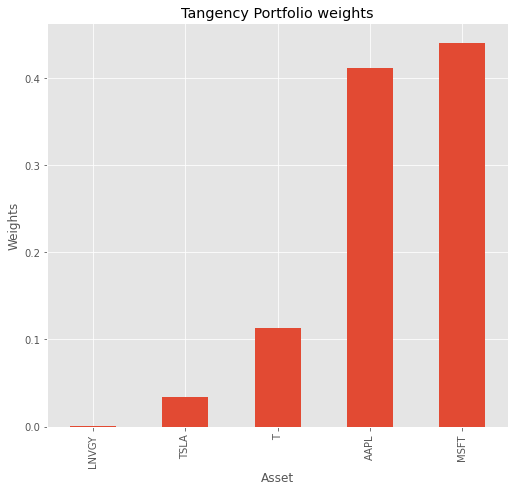

In [21]:
max_sr = pd.Series(max_sr, index=names)
max_sr = max_sr.sort_values()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Asset')
ax1.set_ylabel("Weights")
ax1.set_title("Tangency Portfolio weights")
max_sr.plot(kind = 'bar')
plt.show();
     

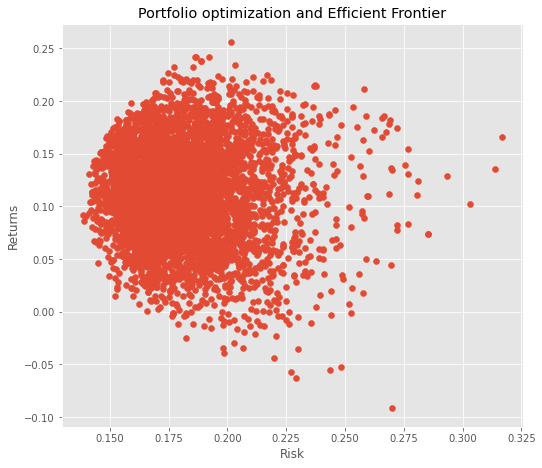

In [22]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Risk')
ax1.set_ylabel("Returns")
ax1.set_title("Portfolio optimization and Efficient Frontier")
plt.scatter(port_risk, port_returns)
plt.show();